<a href="https://colab.research.google.com/github/pranshudatascience/Monkey-Species-classification/blob/main/Monkey_Species_Recogination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"datasciencepranshu","key":"f206fef76574e388b3dba86a1861be62"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d slothkong/10-monkey-species

 99% 543M/547M [00:07<00:00, 119MB/s]
100% 547M/547M [00:07<00:00, 74.8MB/s]


In [7]:
from zipfile import ZipFile
file_name = "10-monkey-species.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
IMAGE_SIZE = [224, 224]

In [8]:
#Give dataset path
train_path = '/content/training/training'
test_path = '/content/validation/validation'

In [10]:
folders = glob('/content/validation/validation/*')
len(folders)

10

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [12]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87916544/87910968 [==============================] - 0s 0us/step


In [13]:
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=10, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)


model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [14]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#no flip and zoom for test dataset

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/training/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1098 images belonging to 10 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/validation/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 272 images belonging to 10 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=8,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
35/35 [==============================] - 79s 1s/step - loss: 0.6800 - accuracy: 0.7878 - val_loss: 0.2030 - val_accuracy: 0.9559
Epoch 2/8
35/35 [==============================] - 42s 1s/step - loss: 0.1785 - accuracy: 0.9472 - val_loss: 0.1760 - val_accuracy: 0.9522
Epoch 3/8
35/35 [==============================] - 42s 1s/step - loss: 0.1112 - accuracy: 0.9663 - val_loss: 0.0635 - val_accuracy: 0.9779
Epoch 4/8
35/35 [==============================] - 42s 1s/step - loss: 0.1129 - accuracy: 0.9663 - val_loss: 0.0608 - val_accuracy: 0.9779
Epoch 5/8
35/35 [==============================] - 41s 1s/step - loss: 0.0625 - accuracy: 0.9809 - val_loss: 0.0893 - val_accuracy: 0.9779
Epoch 6/8
35/35 [==============================] - 42s 1s/step - loss: 0.0644 - accuracy: 0.9818 - val_loss: 0.0594 - val_accuracy: 0.9816
Epoch 7/8
35/35 [==============================] - 41s 1s/step - loss: 0.0417 - accuracy: 0.9827 - val_loss: 0.1030 - val_accuracy: 0.9779
Epoch 8/8
35/35 [==========

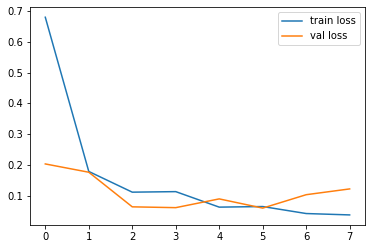

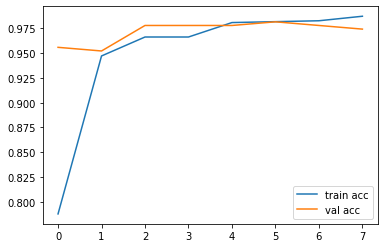

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
from tensorflow.keras.models import load_model

model.save('modelmonkey.h5')

In [23]:
y_pred = model.predict(test_set)

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 2, 4, 7, 8, 8, 2, 8, 2, 3, 2, 5, 8, 8, 7, 5, 5, 4, 6, 8, 0, 0,
       1, 2, 8, 9, 2, 0, 8, 3, 6, 1, 3, 1, 8, 1, 7, 1, 2, 2, 4, 3, 8, 8,
       3, 0, 9, 5, 0, 6, 9, 6, 1, 9, 4, 9, 6, 4, 9, 2, 5, 6, 1, 9, 6, 9,
       2, 8, 1, 3, 0, 4, 2, 1, 7, 4, 7, 3, 9, 9, 9, 9, 3, 2, 3, 1, 5, 5,
       4, 1, 7, 4, 8, 4, 5, 1, 6, 8, 0, 2, 9, 5, 3, 6, 2, 7, 8, 9, 7, 3,
       4, 7, 5, 6, 6, 3, 5, 8, 6, 0, 3, 7, 8, 6, 9, 9, 5, 4, 3, 1, 7, 0,
       9, 1, 2, 4, 9, 8, 5, 0, 8, 0, 1, 2, 1, 5, 5, 7, 7, 8, 7, 6, 0, 3,
       4, 3, 0, 6, 2, 5, 3, 8, 0, 6, 6, 3, 5, 7, 5, 1, 2, 3, 4, 5, 9, 0,
       9, 1, 7, 6, 2, 7, 1, 2, 6, 2, 7, 7, 4, 8, 6, 5, 0, 3, 0, 7, 3, 2,
       5, 0, 2, 9, 7, 0, 4, 7, 4, 0, 9, 0, 5, 1, 3, 5, 8, 2, 3, 3, 9, 6,
       1, 0, 0, 7, 9, 0, 3, 5, 5, 1, 4, 7, 4, 1, 6, 8, 7, 5, 1, 6, 6, 5,
       7, 6, 9, 2, 4, 2, 7, 9, 6, 4, 7, 9, 0, 8, 4, 9, 3, 2, 7, 7, 4, 4,
       3, 5, 3, 1, 1, 4, 8, 9])

In [28]:

classes = ["n0: alouattapalliata ", "n1: erythrocebuspatas",
"n2: cacajaocalvus",  "n3: macacafuscata",
"n4: cebuellapygmea" , "n5: cebuscapucinus",
"n6: micoargentatus" , "n7: saimirisciureus", 
"n8: aotusnigriceps",  "n9: trachypithecusjohnii"]

In [30]:
def predict_image(img):
    plt.figure(figsize=(40,8))
    print()
    print('-------------------------Classification of Monkey Species----------------------------------')
    print('------------------------ THE SPECIES OF THE GiVEN MONKEY IS---------------------------------')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    #img_data=preprocess_input(x)

    print(classes[np.argmax(model.predict(x))])


-------------------------Classification of Monkey Species----------------------------------
------------------------ THE SPECIES OF THE GiVEN MONKEY IS---------------------------------

n0: alouattapalliata 


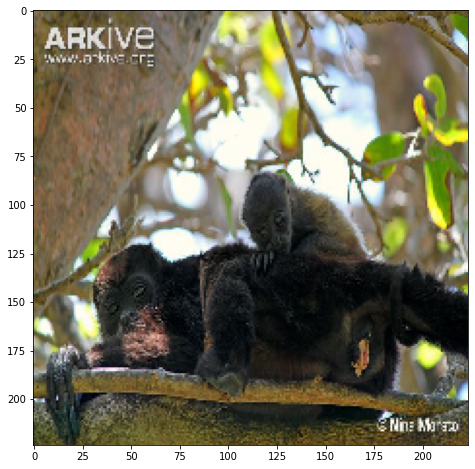

In [31]:
im=image.load_img('/content/validation/validation/n0/n001.jpg',target_size=(224,224))
predict_image(im)


-------------------------Classification of Monkey Species----------------------------------
------------------------ THE SPECIES OF THE GiVEN MONKEY IS---------------------------------

n0: alouattapalliata 


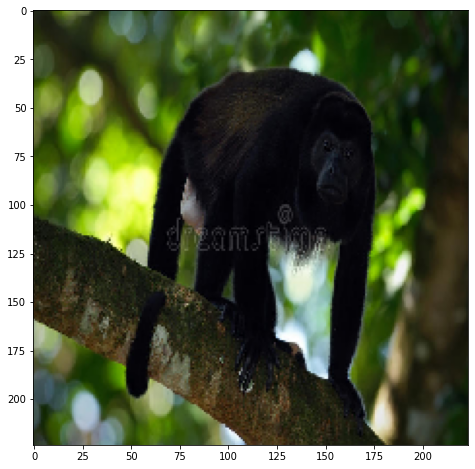

In [32]:
im2=image.load_img('/content/validation/validation/n0/n0017.jpg',target_size=(224,224))
predict_image(im2)


-------------------------Classification of Monkey Species----------------------------------
------------------------ THE SPECIES OF THE GiVEN MONKEY IS---------------------------------

n5: cebuscapucinus


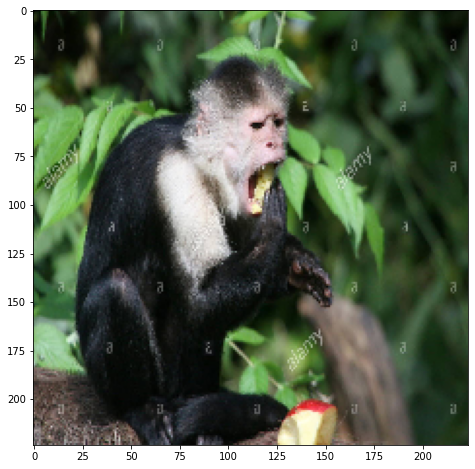

In [33]:
im3=image.load_img('/content/validation/validation/n5/n5012.jpg',target_size=(224,224))
predict_image(im3)


-------------------------Classification of Monkey Species----------------------------------
------------------------ THE SPECIES OF THE GiVEN MONKEY IS---------------------------------

n3: macacafuscata


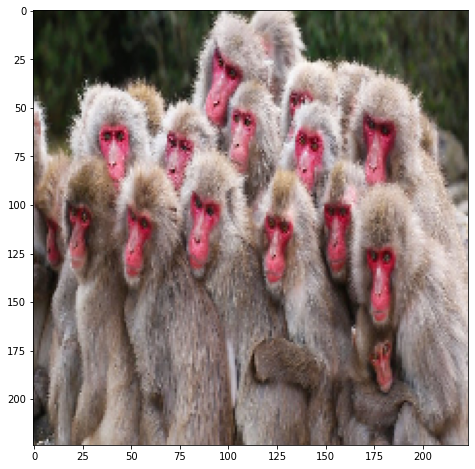

In [34]:
im4=image.load_img('/content/validation/validation/n3/n3015.jpg',target_size=(224,224))
predict_image(im4)


-------------------------Classification of Monkey Species----------------------------------
------------------------ THE SPECIES OF THE GiVEN MONKEY IS---------------------------------

n2: cacajaocalvus


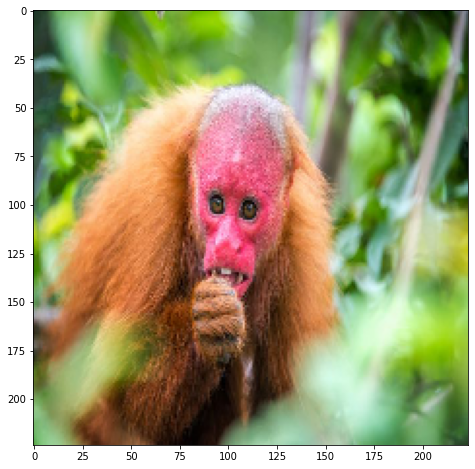

In [35]:
im5=image.load_img('/content/validation/validation/n2/n2011.jpg',target_size=(224,224))
predict_image(im5)


-------------------------Classification of Monkey Species----------------------------------
------------------------ THE SPECIES OF THE GiVEN MONKEY IS---------------------------------

n9: trachypithecusjohnii


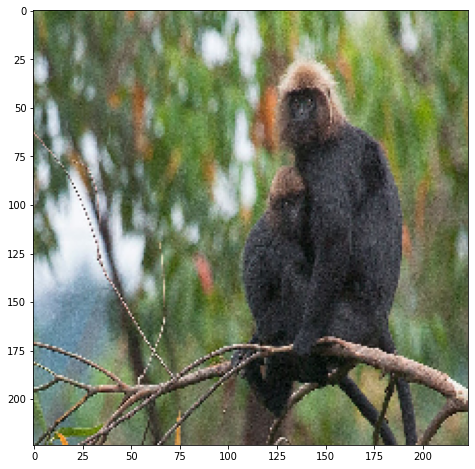

In [36]:
im6=image.load_img('/content/validation/validation/n9/n9012.jpg',target_size=(224,224))
predict_image(im6)


-------------------------Classification of Monkey Species----------------------------------
------------------------ THE SPECIES OF THE GiVEN MONKEY IS---------------------------------

n6: micoargentatus


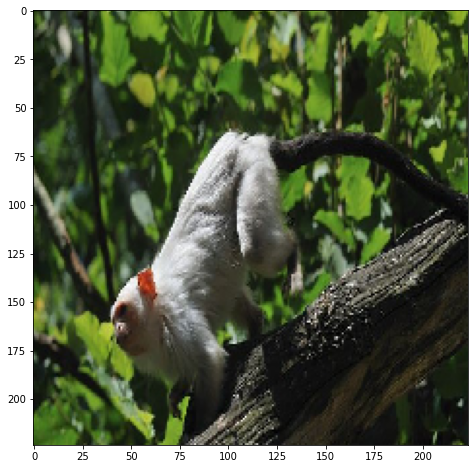

In [37]:
im7=image.load_img('/content/validation/validation/n6/n6012.jpg',target_size=(224,224))
predict_image(im7)